##### Copyright 2018 The TensorFlow Authors.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import keras.backend as kb
import tensorflow as tf
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from PIL import ImageOps

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
keras.__version__

'2.7.0'

In [ ]:
imgall=np.zeros([124,650,650,1])
y=np.zeros([124,6])
dironly=np.zeros([124,2])
fulllabel=np.zeros([124,1])
a=0
di='drive/MyDrive/Colab_Notebooks/249_Final_Project/Direction_Pics_Car1/'
for i in range(23):
    imgall[a,:,:,:]=np.array(Image.open('Left_3s_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a]=[1,0,0,0,0,0]
    dironly[a]=[1,0]
    fulllabel[a]=0
    a+=1
for i in range(13):
    imgall[a,:,:,:]=np.array(Image.open('Left_3w_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a]=[0,1,0,0,0,0]
    dironly[a]=[1,0]
    fulllabel[a]=1
    a+=1
for i in range(15):
    imgall[a,:,:,:]=np.array(Image.open('Left_50_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a]=[0,0,1,0,0,0]
    dironly[a]=[1,0]
    fulllabel[a]=2
    a+=1
for i in range(19):
    imgall[a,:,:,:]=np.array(Image.open('Right_50_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a]=[0,0,0,1,0,0]
    dironly[a]=[0,1]
    fulllabel[a]=3
    a+=1
for i in range(27):
    imgall[a,:,:,:]=np.array(Image.open('Right_3w_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a]=[0,0,0,0,1,0]
    dironly[a]=[0,1]
    fulllabel[a]=4
    a+=1
for i in range(27):
    imgall[a,:,:,:]=np.array(Image.open('Right_3s_{}_2.jpg'.format(str(i)))).reshape(650,650,1)
    y[a]=[0,0,0,0,0,1]
    dironly[a]=[0,1]
    fulllabel[a]=5
    a+=1
  #sharpleft=[1,0,0,0,0,0]
  #wideleft=[0,1,0,0,0,0]
  #sharp50left=[0,0,1,0,0,0]
  #sharp50right=[0,0,0,1,0,0]
  #wideright=[0,0,0,0,1,0]
  #sharpright=[0,0,0,0,0,1]

  #left=[1,0]
  #right=[0,1]
imgall=imgall.astype('float32')/255

In [ ]:
import random
randomlist = random.sample(range(0, 124), int(124*.2))
imgtest=imgall[randomlist,:,:]
ytest=y[randomlist,:]
dironlytest=dironly[randomlist,:]
fulllabeltest=fulllabel[randomlist,:]
main_list = list(set(range(0,124)) - set(randomlist))
imgtrain=imgall[main_list,:,:]
ytrain=y[main_list,:]
dironlytrain=dironly[main_list,:]
fulllabeltrain=fulllabel[main_list,:]

In [ ]:
batch_size = 8
epochs = 100
num_classes=6

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='linear',input_shape=(650,650,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(25, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 650, 650, 128)     1280      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 650, 650, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 325, 325, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 325, 325, 256)     295168    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 325, 325, 256)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 163, 163, 256)    0         
 2D)                                                    

In [ ]:
import timeit

In [ ]:
train = model.fit(imgtrain, ytrain, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(imgtest,ytest))

Epoch 1/100
13/13 [==============================] - 36s 2s/step - loss: 4.5565 - accuracy: 0.3100 - val_loss: 1.6916 - val_accuracy: 0.2083
Epoch 2/100
13/13 [==============================] - 19s 1s/step - loss: 1.3610 - accuracy: 0.5000 - val_loss: 1.5160 - val_accuracy: 0.4167
Epoch 3/100
13/13 [==============================] - 18s 1s/step - loss: 1.2252 - accuracy: 0.4800 - val_loss: 0.6179 - val_accuracy: 0.5417
Epoch 4/100
13/13 [==============================] - 18s 1s/step - loss: 0.3349 - accuracy: 0.8200 - val_loss: 0.4097 - val_accuracy: 0.8750
Epoch 5/100
13/13 [==============================] - 19s 1s/step - loss: 0.1244 - accuracy: 0.9600 - val_loss: 0.1822 - val_accuracy: 0.8750
Epoch 6/100
13/13 [==============================] - 19s 1s/step - loss: 0.1244 - accuracy: 0.9500 - val_loss: 0.1572 - val_accuracy: 0.9583
Epoch 7/100
13/13 [==============================] - 19s 1s/step - loss: 0.0189 - accuracy: 0.9900 - val_loss: 0.0686 - val_accuracy: 0.9583
Epoch 8/100
1

In [ ]:
model.save('Complete_Direction_Car1')

INFO:tensorflow:Assets written to: Complete_Direction_Car1/assets


In [ ]:
!zip -r Full_Direction_Car1.zip Complete_Direction_Car1

  adding: Complete_Direction_Car1/ (stored 0%)
  adding: Complete_Direction_Car1/variables/ (stored 0%)
  adding: Complete_Direction_Car1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: Complete_Direction_Car1/variables/variables.index (deflated 66%)
  adding: Complete_Direction_Car1/keras_metadata.pb (deflated 92%)
  adding: Complete_Direction_Car1/saved_model.pb (deflated 90%)
  adding: Complete_Direction_Car1/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download("Full_Direction_Car1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt


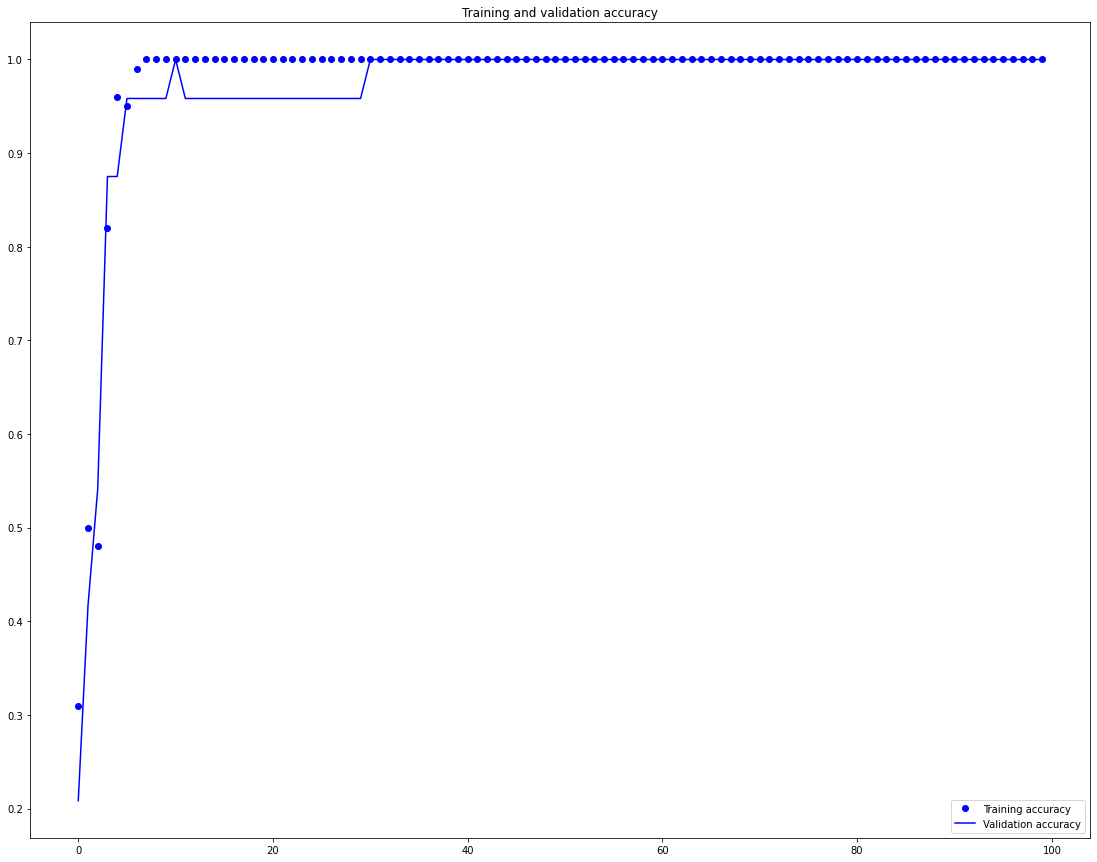

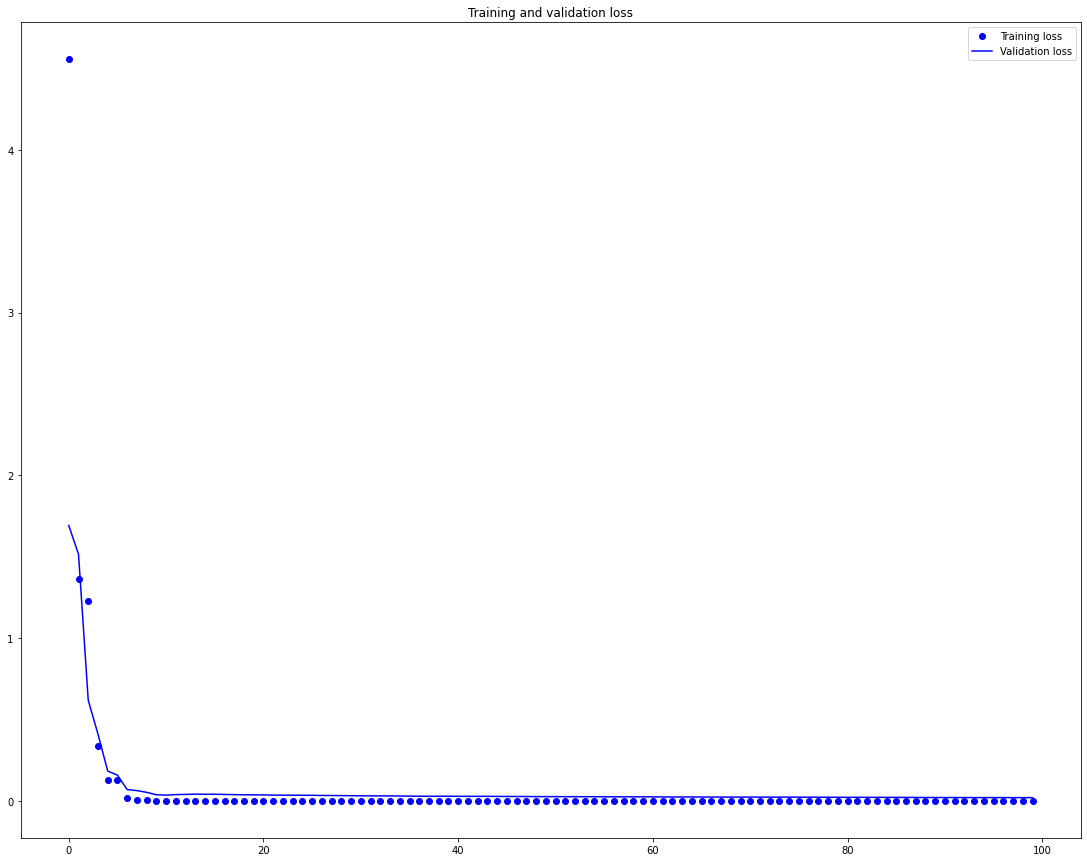

In [ ]:
plt.rcParams["figure.figsize"] = (19,15)
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
ypred1=model.predict(imgtrain[:int(imgtrain.shape[0]/2),:,:])
ypred2=model.predict(imgtrain[int(imgtrain.shape[0]/2):,:,:])

In [ ]:
ypredtot=np.vstack([ypred1,ypred2])
ypredtot=np.argmax(ypredtot,axis=1).reshape(ypredtot.shape[0],1)
np.hstack([ypredtot,fulllabeltrain])

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [4., 4.],
       [4., 4.],
       [4., 4.],
       [4., 4.],
       [4., 4.

In [ ]:
ypred=model.predict(imgtest)
ypred=np.argmax(ypred,axis=1).reshape(ypred.shape[0],1)
np.hstack([ypred,fulllabeltest])

array([[0., 0.],
       [1., 1.],
       [2., 2.],
       [4., 4.],
       [4., 4.],
       [0., 0.],
       [2., 2.],
       [4., 4.],
       [0., 0.],
       [2., 2.],
       [5., 5.],
       [1., 1.],
       [0., 0.],
       [4., 4.],
       [5., 5.],
       [3., 3.],
       [3., 3.],
       [1., 1.],
       [3., 3.],
       [2., 2.],
       [0., 0.],
       [3., 3.],
       [5., 5.],
       [5., 5.]])

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='linear',input_shape=(650,650,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(25, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 650, 650, 64)      640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 650, 650, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 325, 325, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 325, 325, 128)     73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 325, 325, 128)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 163, 163, 128)    0         
 2D)                                                    

In [ ]:
train = model.fit(imgtrain, ytrain, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(imgtest,ytest))

Epoch 1/100
13/13 [==============================] - 20s 587ms/step - loss: 2.4169 - accuracy: 0.1900 - val_loss: 1.5328 - val_accuracy: 0.4583
Epoch 2/100
13/13 [==============================] - 6s 449ms/step - loss: 1.1121 - accuracy: 0.5400 - val_loss: 0.4208 - val_accuracy: 0.8333
Epoch 3/100
13/13 [==============================] - 6s 436ms/step - loss: 0.5459 - accuracy: 0.8400 - val_loss: 0.4101 - val_accuracy: 0.8333
Epoch 4/100
13/13 [==============================] - 6s 448ms/step - loss: 0.2771 - accuracy: 0.8800 - val_loss: 0.2838 - val_accuracy: 0.8750
Epoch 5/100
13/13 [==============================] - 6s 435ms/step - loss: 0.2032 - accuracy: 0.9300 - val_loss: 0.0559 - val_accuracy: 1.0000
Epoch 6/100
13/13 [==============================] - 6s 451ms/step - loss: 0.0447 - accuracy: 0.9900 - val_loss: 0.1067 - val_accuracy: 0.9583
Epoch 7/100
13/13 [==============================] - 6s 437ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 1.000

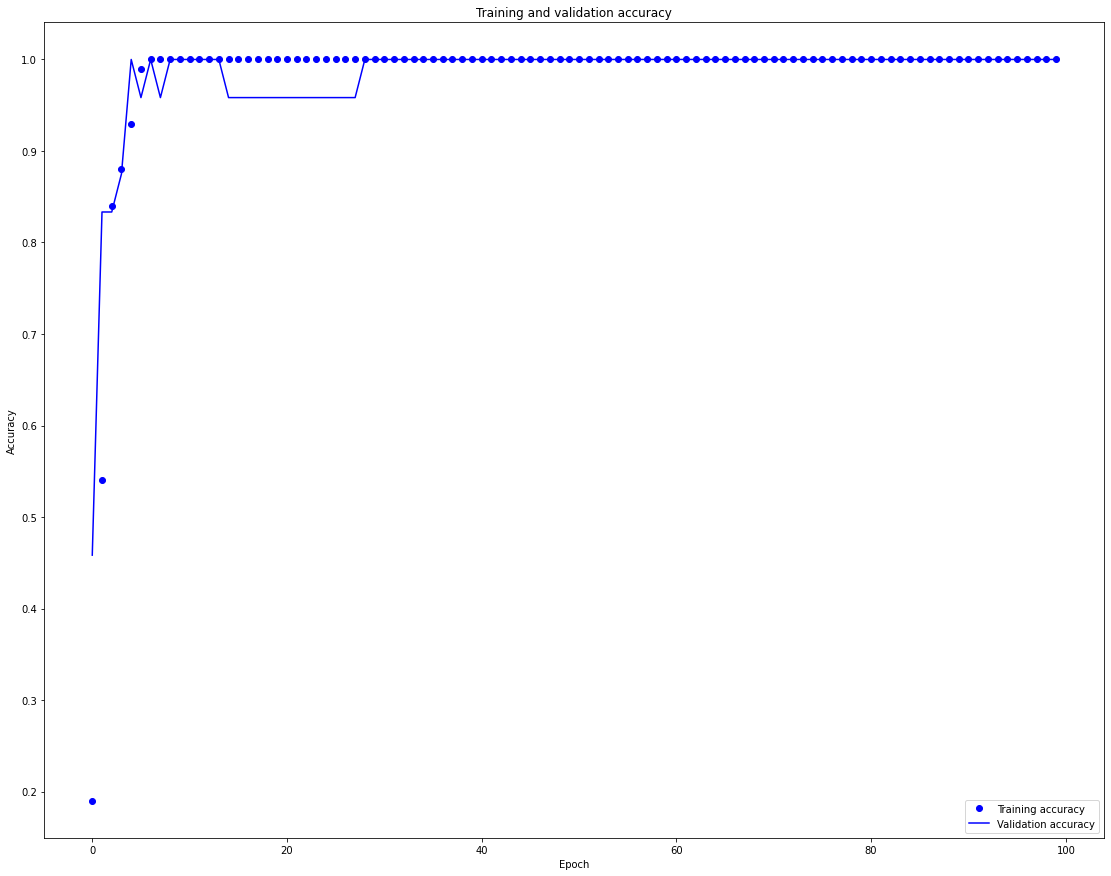

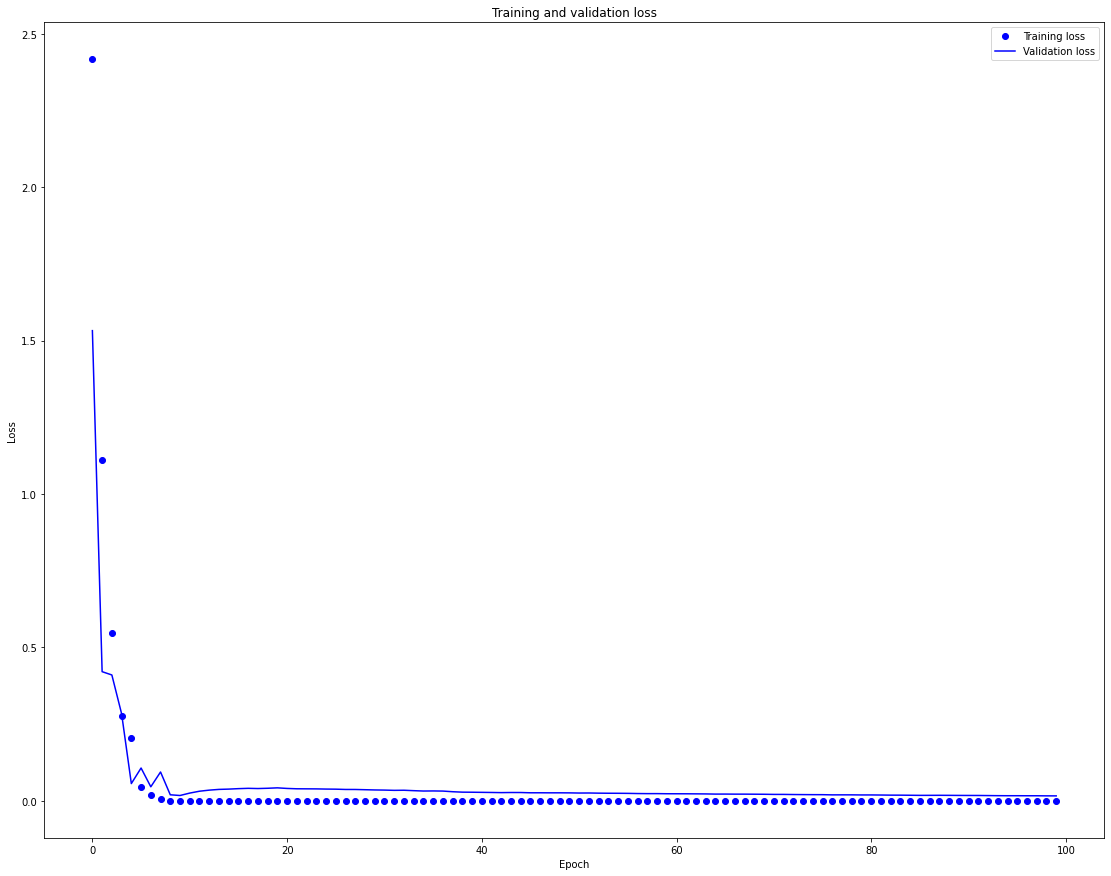

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (19,15)
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1.680331563127452